## read xlsx file
this file aims to deal with commensurate issue</br>
as well as correlation between features</br>
please notice that</br>
the categorical attrs in columns are all interval attrs or binary attrs(0 or 1)</br>
so, we don't need to convert any attr to onehot encoding.


In [1]:
import pandas as pd
tr = pd.read_excel('./temp/3_data_transform.xlsx')

In [2]:
tr.shape#expected 68 attr(include outcome)

(1406, 51)

### step1: try PCA to do dimension reduction

In [3]:
tr_x = tr.iloc[:, 1:]
print(tr_x.shape)
tr_y = tr['outcome']
print(tr_y.shape)

(1406, 50)
(1406,)


(984, 12)
(984, 15)
(984, 18)
(984, 25)
(984, 34)
[12, 15, 18, 25, 34]


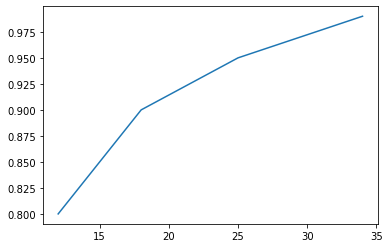

In [10]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(tr_x, tr_y, test_size=0.3, random_state=42, stratify=tr[['outcome']])
ratio = [0.8, 0.85, 0.9, 0.95, 0.99]
comp = []
for c in ratio:
    X_train, X_test, y_train, y_test = train_test_split(tr_x, tr_y, test_size=0.3, random_state=42, stratify=tr[['outcome']])
    pca = PCA(n_components=c)
    X_train = pca.fit_transform(X_train)
    print(X_train.shape)
    X_test = pca.transform(X_test)
    comp.append(X_train.shape[1])

plt.plot(comp, ratio)
print(comp)

# lda = LinearDiscriminantAnalysis(n_components=0.99)
# X_train = pca.fit_transform(X_train, y_train)
# X_test = pca.transform(X_test)


In [11]:
X_train

array([[ 0.27578677,  0.93517483,  1.06051934, ..., -0.07526577,
         0.07204977, -0.05886011],
       [ 0.35530528, -0.29937914, -0.56435579, ...,  0.05163997,
         0.01377517,  0.0214055 ],
       [-0.05949161,  1.31679414, -0.56286592, ..., -0.01734353,
        -0.14134926, -0.00443258],
       ...,
       [-0.71480378,  0.12900522,  0.55201797, ..., -0.01351938,
         0.04884424, -0.00986348],
       [ 0.00594115, -0.61535777,  0.66265051, ...,  0.05042019,
         0.03668469,  0.00424114],
       [-0.62795146,  0.10178177,  0.08255831, ..., -0.06162165,
         0.11512652, -0.01685337]])

### step2:try some classifier

In [12]:
from sklearn import tree
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix, accuracy_score, roc_auc_score

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [13]:
#train
y_pred = clf.predict(X_train)

f1 = f1_score(y_pred, y_train)
re = recall_score(y_pred, y_train)
prec = precision_score(y_pred, y_train)
cm = confusion_matrix(y_pred, y_train)
acc = accuracy_score(y_pred, y_train)
roc = roc_auc_score(y_pred, y_train)

In [14]:
print('train')
print('f1:', f1)
print('recall:', re)
print('precision:', prec)
print('accuracy:', acc)
print('roc:', roc)
print('confusion_matrix:\n', cm)

train
f1: 1.0
recall: 1.0
precision: 1.0
accuracy: 1.0
roc: 1.0
confusion_matrix:
 [[492   0]
 [  0 492]]


In [15]:
#test
y_pred = clf.predict(X_test)
f1 = f1_score(y_pred, y_test)
re = recall_score(y_pred, y_test)
prec = precision_score(y_pred, y_test)
cm = confusion_matrix(y_pred, y_test)
acc = accuracy_score(y_pred, y_test)
roc = roc_auc_score(y_pred, y_test)

In [16]:
print('test')
print('f1:', f1)
print('recall:', re)
print('precision:', prec)
print('accuracy:', acc)
print('roc:', roc)
print('confusion_matrix:\n', cm)
#用了pca反而各種metric都下降
#lda也是

test
f1: 0.98812351543943
recall: 0.9904761904761905
precision: 0.985781990521327
accuracy: 0.9881516587677726
roc: 0.988162623539982
confusion_matrix:
 [[209   3]
 [  2 208]]


In [17]:
tr.shape

(1406, 51)

### finally save the outcome

In [18]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('./temp/4_data_reduction.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
tr.to_excel(writer, sheet_name='Sheet1', index=False)

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [19]:
tr

,Diagnosis_5,Coagulopathy,Alcohol Abuse,Hypothyroidism,Anemia_0,Other Neurological Disorders,Renal Failure,elx3,Psyciatric disorder_0,Congestive Heart Failure,...,CBC_MCHC,GOT,CBC_WBC,OP_time_hour,CBC_RDWCV,K,ALB,Crea,CBC_RDW,outcome
0,0,0,0,0,1,0,0,0,1,0,...,0.598675,0.062684,0.029181,0.207585,0.158672,0.492624,0.624085,0.100308,0.256115,0
1,0,0,0,0,1,0,0,0,1,0,...,0.529801,0.055900,0.022650,0.197605,0.151005,0.463808,0.567798,0.064322,0.066547,0
2,0,0,0,0,1,0,0,0,1,0,...,0.622517,0.059735,0.030578,0.277312,0.137447,0.502573,0.449900,0.117212,0.620504,0
3,0,0,0,0,1,0,0,0,0,0,...,0.597792,0.073451,0.031635,0.337325,0.133707,0.492739,0.597605,0.084598,0.255635,0
4,0,0,0,0,1,0,0,0,1,0,...,0.615011,0.056342,0.035447,0.298736,0.149790,0.448256,0.630739,0.091261,0.301799,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1401,0,0,0,0,1,0,0,0,1,0,...,0.598234,0.090708,0.035561,0.278643,0.185601,0.451801,0.319361,0.093152,0.241847,1
1402,0,0,1,0,1,0,0,1,1,0,...,0.620751,0.055015,0.040544,0.274118,0.207574,0.396455,0.513373,0.073206,0.245683,1
1403,0,0,0,0,1,0,0,0,1,0,...,0.603532,0.039823,0.034692,0.282236,0.156241,0.291595,0.508982,0.022209,0.175899,1
1404,0,0,0,0,1,0,0,0,1,0,...,0.634437,0.061209,0.029898,0.303393,0.124825,0.475586,0.535862,0.093317,0.227578,1


## write file to .data and .names

In [52]:
%cd /Users/pao/Documents/data_mining/project1

/Users/pao/Documents/data_mining/project1


In [59]:
tr.to_csv("./temp/tr_data.data", index=False, header=False)
